# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [2]:
import cv2 as cv  # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt
from google.colab.patches import cv2_imshow # import library google.colab  cv2_imshow

In [3]:
!wget !wget https://assets.gezdev.com/dip/SUDOKU.png #ดาวน์โหลดไฟล์

--2022-09-22 05:01:24--  http://!wget/
Resolving !wget (!wget)... failed: Name or service not known.
wget: unable to resolve host address ‘!wget’
--2022-09-22 05:01:25--  https://assets.gezdev.com/dip/SUDOKU.png
Resolving assets.gezdev.com (assets.gezdev.com)... 203.158.180.101
Connecting to assets.gezdev.com (assets.gezdev.com)|203.158.180.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218511 (213K) [image/png]
Saving to: ‘SUDOKU.png’

SUDOKU.png          100%[===================>] 213.39K   335KB/s    in 0.6s    

2022-09-22 05:01:26 (335 KB/s) - ‘SUDOKU.png’ saved [218511/218511]

FINISHED --2022-09-22 05:01:26--
Total wall clock time: 1.5s
Downloaded: 1 files, 213K in 0.6s (335 KB/s)


In [4]:
img = cv.imread("SUDOKU.png") #อ่านไฟล์ SUDOKU.png แล้วเก็บค่าในตัวแปร img

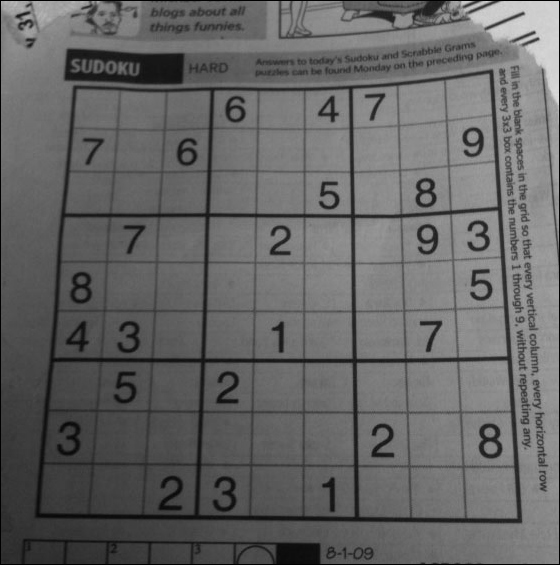

In [5]:
cv2_imshow(img) #แสดงภาพ

In [6]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #แปลงภาพเป็น BGR2GRAY

In [7]:
_,img_bin = cv.threshold(img_gray,128,255,cv.THRESH_BINARY) #ทำการปรับค่า threshold (ภาพสีเทา,ค่าที่ต้องการปรับ,ค่าสุงสุด,ประเภทของ threshold)
_,img_bininv = cv.threshold(img_gray,128,255,cv.THRESH_BINARY_INV) #ทำการปรับค่า threshold (ภาพสีเทา,ค่าที่ต้องการปรับ,ค่าสุงสุด,ประเภทของ threshold) #THRESH_BINARY_INV ค่าตรงข้าม

In [8]:
window_size = 21 #ขนาดบล็อก
c_value = 10 #ค่า C

In [9]:
adjusted_mean_img = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,window_size,c_value,10) #.ใช้ฟังก์ชั่น adaptiveThreshold (รูปภาพ , maxValue , adaptiveMethod ,thresholdType , blockSize  , C)

In [10]:
adjusted_gaussian_img = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,window_size,c_value,10) #.ใช้ฟังก์ชั่น adaptiveThreshold (รูปภาพ , maxValue , adaptiveMethod ,thresholdType , blockSize  , C)

adaptiveMethod


*   ADAPTIVE_THRESH_MEAN_C − threshold value is the mean of neighborhood area.    คำนวณค่าเฉลี่ยรอบข้างขนาด blockSize×blockSize แล้วหักจากค่า C
*   ADAPTIVE_THRESH_GAUSSIAN_C − threshold value is the weighted sum of   
      neighborhood values where weights are a Gaussian window.
คำนวณค่าเฉลี่ยรอบข้างขนาด blockSize×blockSize โดยถ่วงน้ำหนักด้วยฟังก์ชันเกาส์ แล้วหักจากค่า C


  

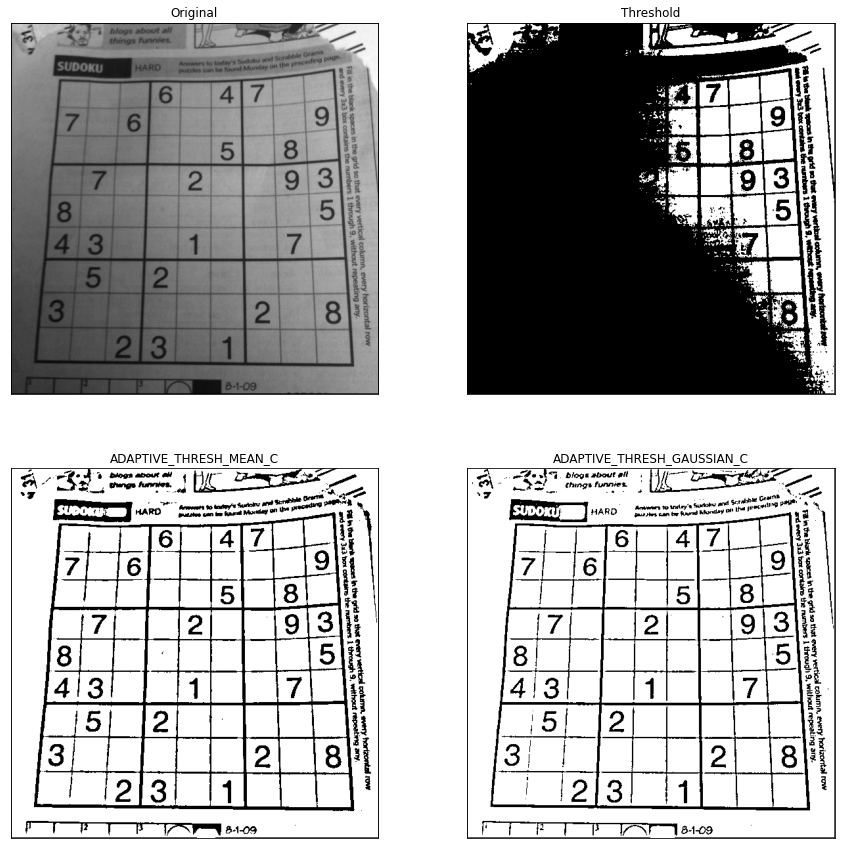

In [11]:
plt.rcParams["figure.figsize"] = [15, 15] # กำหนดขนาดภาพ 15x15
plt.subplot(221),plt.imshow(img_gray,cmap='gray'),plt.title('Original'),plt.xticks([]),plt.yticks([]) #แสดงภาพ img_gray โดยกำหนด title ชื่อว่า Original
plt.subplot(222),plt.imshow(img_bin,cmap='gray'),plt.title('Threshold'),plt.xticks([]),plt.yticks([]) #แสดงภาพ img_bin โดยกำหนด title ชื่อว่า Threshold
plt.subplot(223),plt.imshow(adjusted_mean_img,cmap='gray'),plt.title('ADAPTIVE_THRESH_MEAN_C'),plt.xticks([]),plt.yticks([])  #แสดงภาพ adjusted_mean_img โดยกำหนด title ชื่อว่า ADAPTIVE_THRESH_MEAN_C
plt.subplot(224),plt.imshow(adjusted_gaussian_img,cmap='gray'),plt.title('ADAPTIVE_THRESH_GAUSSIAN_C'),plt.xticks([]),plt.yticks([]) #แสดงภาพ adjusted_gaussian_img โดยกำหนด title ชื่อว่า ADAPTIVE_THRESH_GAUSSIAN_C
plt.show()

ทดลองปรับค่า WindowSize และ C

ADAPTIVE_THRESH_MEAN_C ค่า c น้อยภาพจะมีสีดำ ค่า c มากขึ้นภาพจะมีสีขาว 
  เช่น c = -3 ภาพมีสีดำ  c = 17 ภาพบางส่วนจะค่อยหายไป
  c = 9 ภาพค่อนข้างมีรายละเอียดที่ค่อนข้างครบ

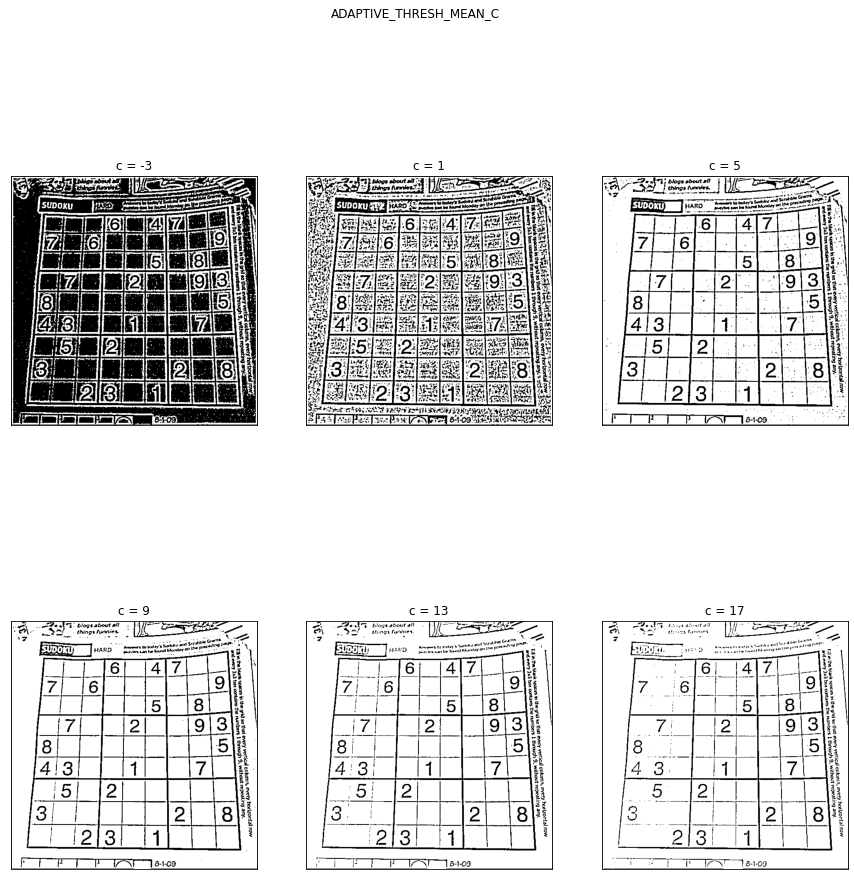

In [68]:
plt.suptitle('ADAPTIVE_THRESH_MEAN_C')
for i in range(6):
    c_value =4*i-3
    adjusted_mean_img2 = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,9,c_value,10) 
    plt.subplot(2,3,i+1,title='c = %d'%c_value,xticks=[],yticks=[])
    plt.imshow(adjusted_mean_img2,cmap='gray')

ADAPTIVE_THRESH_GAUSSIAN_C 

จากการสังเกตไม่ค่อยเห็นความแตกต่างกัน



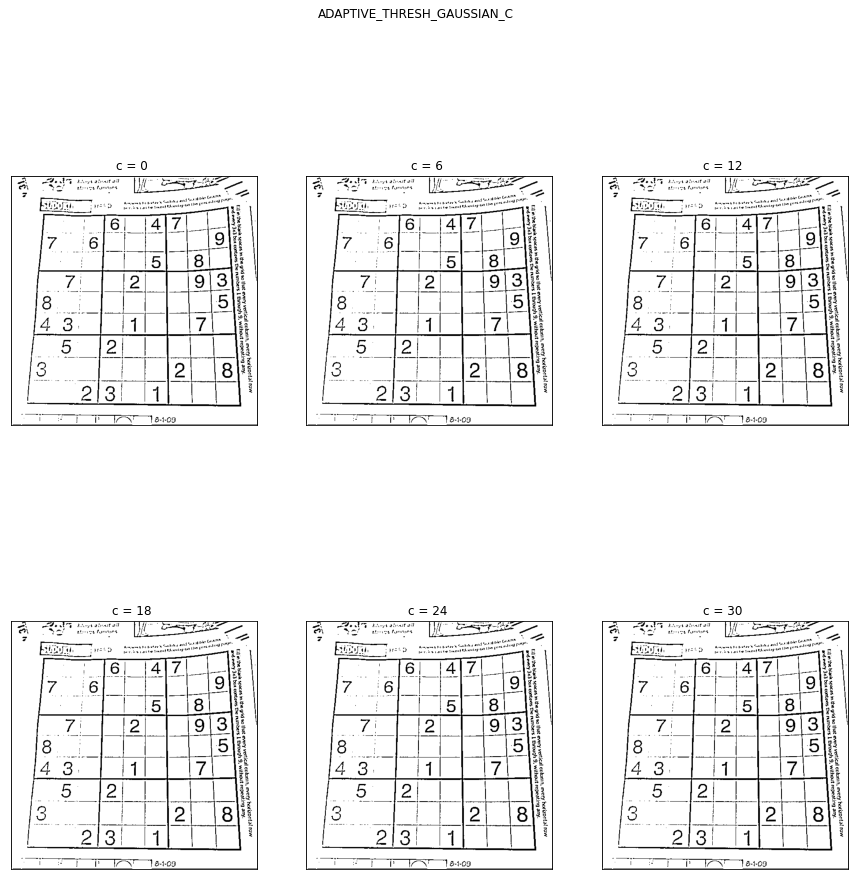

In [98]:
plt.suptitle('ADAPTIVE_THRESH_GAUSSIAN_C')
for i in range(6):
    c_value =6*i
    blockSize  = 2*i+3
    adjusted_gaussian_img2 = cv.adaptiveThreshold(img_gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,blockSize ,c_value,10)   
    plt.subplot(2,3,i+1,title='c = %d '%c_value,xticks=[],yticks=[])
    plt.imshow(adjusted_mean_img2,cmap='gray')